## RF linac example



In [1]:
from abel import *
import numpy as np


CLICopti version 2.0
Copyright (C) 2014- 
 Kyrre Ness Sjobak <k.n.sjobak@fys.uio.no> (CERN and University of Oslo),
 Daniel Schulte (CERN),
 Alexej Grudiev (CERN),
 Andrea Latina (CERN),
 Jim Ögren (Uppsala University and CERN)

We have invested a lot of time and effort in creating and maintaining the CLICopti library,
 please cite it when using it. See the CITATION file in the source distribution
 (e.g. on https://gitlab.cern.ch/clic-software/clicopti ) for more information.



## Define the linac and beams

In [2]:
# define beam
source = SourceBasic()
source.charge = -1e10 * SI.e # [C]
source.energy = 5e9 # [eV]
#source.rel_energy_spread = 0.1
source.rel_energy_spread = 0.005
source.bunch_length = 18e-6 # [m]
source.z_offset = -36e-6 # [m]
source.emit_nx, source.emit_ny = 160e-6, 0.56e-6 # [m rad]
##source.beta_x = stage.matched_beta_function(source.energy)
##source.beta_y = source.beta_x
#source.num_particles = 5000
source.num_particles = 10000
##source.jitter.t = driver.jitter.t

In [3]:
driverLinac = RFlinac(length=500,num_structures=2500, gradient=100e6, beam_pulse_length=100e-9, beam_current=1)
print("Linac fill factor =", driverLinac.fill_factor)
print("Voltage =", driverLinac.voltage/1e9, "[GV], per structure =", \
      driverLinac.voltage_structure/1e6, "[MV]")
print("Power per structure =", driverLinac.getStructurePower()/1e6, "[MW]")
print("Total RF->Efficiency =", driverLinac.getRFEfficiency()*100, "[%]")
print("Energy per structure =", driverLinac.getStructurePulseEnergy(), "[J]")
print("Max pulse length =", driverLinac.getMaxPulseLength()*1e9, "[ns]")

Linac fill factor = 0.9997914258558303
Voltage = 49.9895712927915 [GV], per structure = 19.995828517116603 [MV]
Power per structure = 54.61791647998622 [MW]
Total RF->Efficiency = 20.54890459261676 [%]
Energy per structure = 9.730848876636044 [J]
Max pulse length = 263.75590408088067 [ns]


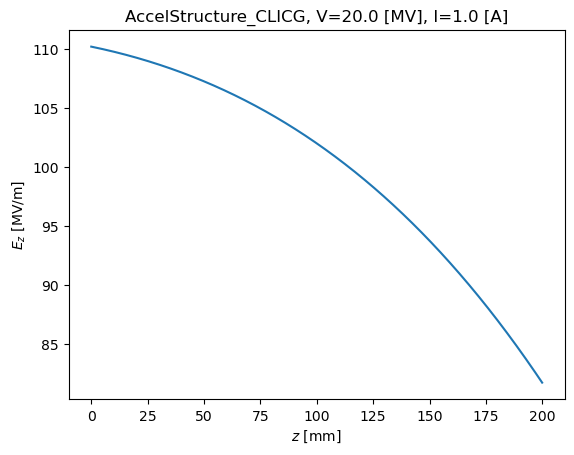

In [4]:
driverLinac.plotGradientProfile()

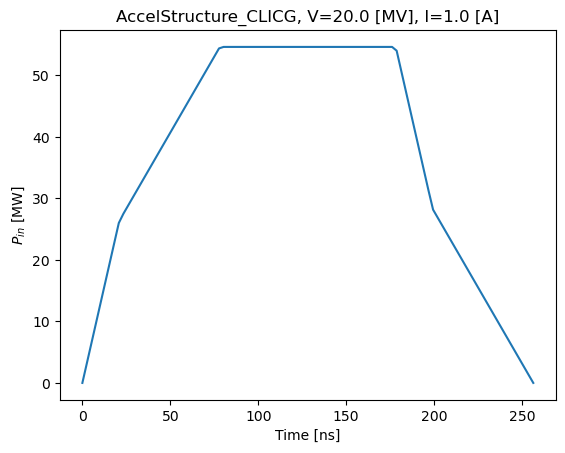

In [5]:
driverLinac.plotPowerProfile()
